<a href="https://colab.research.google.com/github/Areliortiz/Simulaci-n-/blob/main/integracion_MC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#importamos librerias
import random as rnd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
                                                        # Método de la Media Muestral
def media(N):
    # Genera N muestras de la función sqrt(arctan(x))
    muestras = [np.sqrt(np.arctan(rnd.random())) for _ in range(N)]
    # Calcula la media de las muestras
    media_ = np.mean(muestras)
    # La estimación de la integral es la media multiplicada por el tamaño del intervalo (1)
    integral_estimacion = media_ * 1  # El intervalo es [0, 1]
    # Calcula la desviación estándar de las muestras
    std_dev = np.std(muestras)
    # Calcula el puntaje z para un intervalo de confianza del 95%
    z_score = stats.norm.ppf(0.975)  # para un intervalo de confianza del 95%
    # Calcula el margen de error para el intervalo de confianza
    error_margen = z_score * std_dev / np.sqrt(N)
    return integral_estimacion, error_margen

In [3]:
                    # Método de Acierto y Error
def acierto_error(N):
    # Calcula el valor máximo de sqrt(arctan(x)) en el intervalo [0, 1]
    M = np.sqrt(np.arctan(1))
    contador = 0
    puntos_x = []
    puntos_y = []
    for _ in range(N):
        # Genera un punto aleatorio (u1, u2) en el rectángulo [0, 1] x [0, M]
        u1 = rnd.random()
        u2 = rnd.uniform(0, M)
        puntos_x.append(u1)
        puntos_y.append(u2)
        # Cuenta cuántos puntos caen debajo de la curva sqrt(arctan(x))
        if u2 <= np.sqrt(np.arctan(u1)):
            contador += 1
    # Calcula la proporción de puntos debajo de la curva
    probabilidad = contador / N
    # La estimación de la integral es la proporción multiplicada por el área del rectángulo
    integral_estimacion = probabilidad * M
    # Calcula el margen de error para el intervalo de confianza
    error_margen = np.sqrt(probabilidad * (1 - probabilidad) / N) * M
    return integral_estimacion, error_margen, puntos_x, puntos_y

Estimación Media Muestral: 0.6298 ± 0.0127


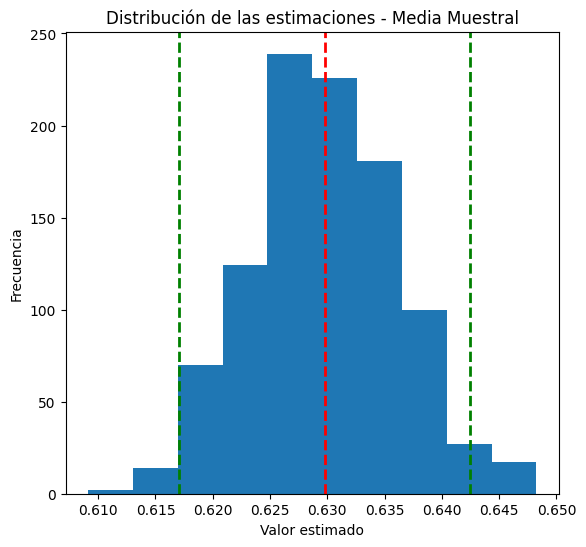

In [4]:
# Parámetros
N = 1000  # Número de muestras por simulación
simulaciones = 1000  # Número de simulaciones

# Estimación con Media Muestral
estimaciones_media = [media(N) for _ in range(simulaciones)]
valores_media = [estimacion[0] for estimacion in estimaciones_media]
errores_media = [estimacion[1] for estimacion in estimaciones_media]
# Graficar resultados de las distribuciones de estimaciones
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
# Histograma de las estimaciones usando el método de Media Muestral
plt.hist(valores_media)
plt.title("Distribución de las estimaciones - Media Muestral")
plt.xlabel("Valor estimado")
plt.ylabel("Frecuencia")
# Línea vertical roja para la media de las estimaciones
plt.axvline(np.mean(valores_media), color='red', linestyle='dashed', linewidth=2)
# Líneas verticales verdes para el intervalo de confianza
plt.axvline(np.mean(valores_media) - np.mean(errores_media), color='green', linestyle='dashed', linewidth=2)
plt.axvline(np.mean(valores_media) + np.mean(errores_media), color='green', linestyle='dashed', linewidth=2)
# Mostrar resultados finales con intervalos de confianza
print(f"Estimación Media Muestral: {np.mean(valores_media):.4f} ± {np.mean(errores_media):.4f}")

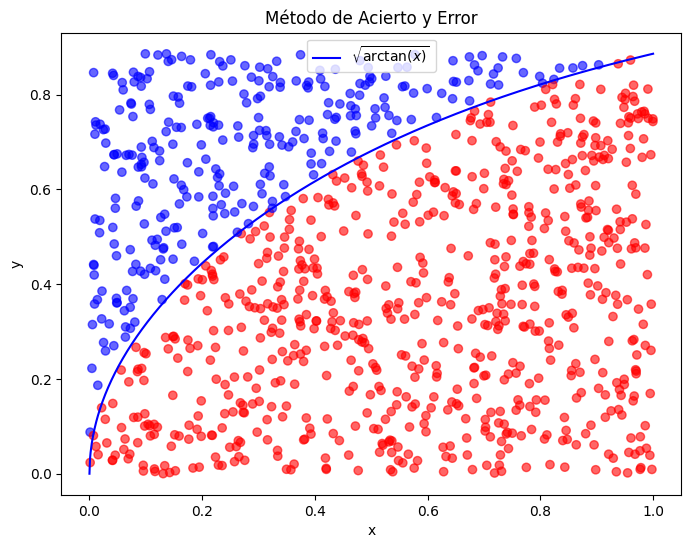

<Figure size 1400x600 with 0 Axes>

<Figure size 1400x600 with 0 Axes>

In [5]:
# Parámetros
N = 1000  # Número de muestras por simulación
simulaciones = 1000  # Número de simulaciones

# Estimación con Acierto y Error
estimaciones_acierto_error = [acierto_error(N) for _ in range(simulaciones)]
valores_acierto_error = [estimacion[0] for estimacion in estimaciones_acierto_error]
errores_acierto_error = [estimacion[1] for estimacion in estimaciones_acierto_error]

# Graficar puntos del método de Acierto y Error
_, _, puntos_x, puntos_y = acierto_error(N)

# Genera una curva para sqrt(arctan(x)) en el intervalo [0, 1]
x = np.linspace(0, 1, 1000)
y = np.sqrt(np.arctan(x))

plt.figure(figsize=(8, 6))
# Grafica la curva sqrt(arctan(x))
plt.plot(x, y, label=r'$\sqrt{\arctan(x)}$', color='blue')
# Grafica los puntos generados, coloreando los que están debajo de la curva en rojo y los que están arriba en azul
plt.scatter(puntos_x, puntos_y, c=['red' if y <= np.sqrt(np.arctan(x)) else 'blue' for x, y in zip(puntos_x, puntos_y)], alpha=0.6)
plt.title("Método de Acierto y Error")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

# Graficar resultados de las distribuciones de estimaciones
plt.figure(figsize=(14, 6))




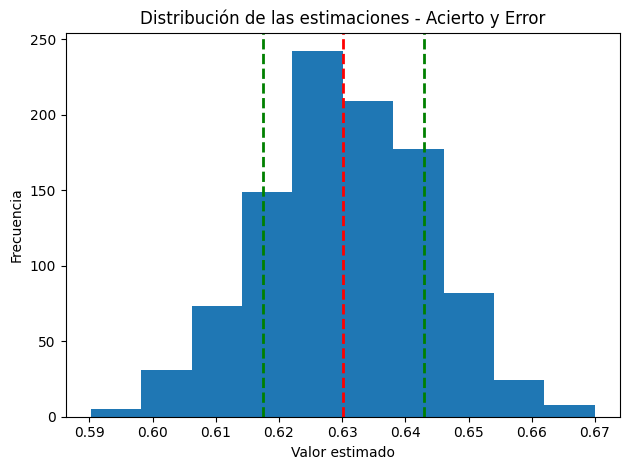

Estimación Acierto y Error: 0.6302 ± 0.0127


In [6]:
# Histograma de las estimaciones usando el método de Acierto y Error
plt.hist(valores_acierto_error)
plt.title("Distribución de las estimaciones - Acierto y Error")
plt.xlabel("Valor estimado")
plt.ylabel("Frecuencia")
# Línea vertical roja para la media de las estimaciones
plt.axvline(np.mean(valores_acierto_error), color='red', linestyle='dashed', linewidth=2)
# Líneas verticales verdes para el intervalo de confianza
plt.axvline(np.mean(valores_acierto_error) - np.mean(errores_acierto_error), color='green', linestyle='dashed', linewidth=2)
plt.axvline(np.mean(valores_acierto_error) + np.mean(errores_acierto_error), color='green', linestyle='dashed', linewidth=2)

plt.tight_layout()
plt.show()

# Mostrar resultados finales con intervalos de confianza

print(f"Estimación Acierto y Error: {np.mean(valores_acierto_error):.4f} ± {np.mean(errores_acierto_error):.4f}")

Para generar el intervalo de confianza\
Usamos la desigualdad de chebyshev\
$P(|x−\mu|>∈)≤\frac{Var}{∈^2 }$\
si la variable es conocida la muestra N~($\mu,\sigma$)\
si es desconocida la muetsra tendra distribucion t